In [28]:
import pandas as pd
import sqlite3
!pip install h5py
import h5py
import numpy as np
import os
from tqdm import tqdm

In [29]:
columns = 'track_id name artist artist_id artist_mbtags year duration loudness tempo time_signature danceability energy hottness_2010 '.split()
columns += [f'chroma_{x+1}' for x in range(12)]
columns += [f'MFCC_{x+1}' for x in range(12)]
data = {c: [] for c in columns}
print(data)

{'track_id': [], 'name': [], 'artist': [], 'artist_id': [], 'artist_mbtags': [], 'year': [], 'duration': [], 'loudness': [], 'tempo': [], 'time_signature': [], 'danceability': [], 'energy': [], 'hottness_2010': [], 'chroma_1': [], 'chroma_2': [], 'chroma_3': [], 'chroma_4': [], 'chroma_5': [], 'chroma_6': [], 'chroma_7': [], 'chroma_8': [], 'chroma_9': [], 'chroma_10': [], 'chroma_11': [], 'chroma_12': [], 'MFCC_1': [], 'MFCC_2': [], 'MFCC_3': [], 'MFCC_4': [], 'MFCC_5': [], 'MFCC_6': [], 'MFCC_7': [], 'MFCC_8': [], 'MFCC_9': [], 'MFCC_10': [], 'MFCC_11': [], 'MFCC_12': []}


In [30]:
def traverse_folder(folder_path):
    
    total_files = sum([len(files) for _, _, files in os.walk(folder_path)])
    progress_bar = tqdm(total=total_files, desc="Processing", unit="file")
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            with h5py.File(file_path, 'r') as file:
                analysis_group = file['analysis']
                general_analysys = analysis_group['songs'][()][0]
                musicbrainz_group = file['musicbrainz']
                metadata = file['metadata']['songs'][0]
                data['track_id'].append(general_analysys[30].decode('utf-8'))
                data['name'].append(metadata[18].decode('utf-8'))
                data['artist'].append(metadata[9].decode('utf-8'))
                data['artist_id'].append(metadata[4].decode('utf-8'))
                data['artist_mbtags'].append(f'{[x.decode("utf-8") for x in musicbrainz_group["artist_mbtags"]]}')
                data['year'].append(musicbrainz_group['songs'][0][1])
                data['duration'].append(general_analysys[3])
                data['loudness'].append(general_analysys[23])
                data['tempo'].append(general_analysys[27])
                data['time_signature'].append(general_analysys[28])
                data['hottness_2010'].append(metadata[16])
                chromas = np.mean(analysis_group['segments_pitches'][()], axis=0)
                mfcc = np.mean(analysis_group['segments_timbre'][()], axis=0)
                for n in range(12):
                    data[f'chroma_{n+1}'].append(chromas[n])
                    data[f'MFCC_{n+1}'].append(mfcc[n])
            progress_bar.update(1)
    
    # Завершаем прогресс-бар
    progress_bar.close()

In [31]:
folder_path = r'C:\Users\mayko\YandexDisk-makorablina@edu.hse.ru\eblan from tula\MillionSongSubset'
traverse_folder(folder_path)

Processing: 100%|██████████| 10000/10000 [00:36<00:00, 272.50file/s]


In [ ]:
del data['danceability']
del data['energy']

In [33]:
df = pd.DataFrame(data)
df.to_csv(r'C:\Users\mayko\YandexDisk-makorablina@edu.hse.ru\eblan from tula\music_features_new.csv')

In [34]:
df.describe()

,year,duration,loudness,tempo,time_signature,hottness_2010,chroma_1,chroma_2,chroma_3,chroma_4,...,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5648.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,934.704600,238.507518,-10.485668,122.915449,3.564800,0.342822,0.438909,0.431319,0.359206,0.300347,...,12.533812,2.083290,-3.593771,-6.151606,-4.644037,-1.373242,2.987378,2.206327,-0.630693,3.005658
std,996.650657,114.137514,5.399788,35.184412,1.266239,0.247220,0.147469,0.153001,0.114588,0.109678,...,37.837684,16.743986,23.057972,14.283725,15.508575,8.167827,11.230488,6.562126,4.646944,8.579352
min,0.000000,1.044440,-51.643000,0.000000,0.000000,0.000000,0.012386,0.027143,0.029694,0.014688,...,-196.553552,-85.196147,-132.345604,-55.086545,-103.430750,-54.343608,-105.477236,-41.631664,-33.478000,-63.765014
25%,0.000000,176.032200,-13.163250,96.965750,3.000000,0.000000,0.335418,0.320328,0.282017,0.223731,...,-10.162563,-8.030588,-17.827071,-16.215796,-13.367950,-6.131158,-3.182036,-2.108271,-3.273201,-2.344793
50%,0.000000,223.059140,-9.380000,120.161000,4.000000,0.360371,0.435507,0.428013,0.352859,0.292516,...,12.766599,0.165753,-2.710597,-7.750399,-3.958037,-1.390160,3.409976,2.107016,-0.460844,2.774383
75%,2000.000000,276.375060,-6.532500,144.013250,4.000000,0.537504,0.537808,0.534930,0.430658,0.366178,...,33.495442,10.070842,10.469103,2.188737,4.922119,3.321314,9.629670,6.436453,2.112264,7.914160
max,2010.000000,1819.767710,0.566000,262.828000,7.000000,1.000000,0.975931,0.992039,0.970968,0.921784,...,308.582274,155.737215,128.885317,94.518915,114.193757,90.508778,58.093843,38.331479,30.606404,52.413890


In [61]:
df.head(5)

,track_id,name,artist,artist_id,artist_mbtags,year,duration,loudness,tempo,time_signature,...,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12
0,TRAAAAW128F429D538,I Didn't Mean To,Casual,ARD7TVE1187B99BFB1,[],0,218.93179,-11.197,92.198,4,...,-5.789682,-0.789844,-43.234903,15.170947,15.139038,1.505001,6.589571,12.298555,-13.563280,5.442480
1,TRAAABD128F429CF47,Soul Deep,The Box Tops,ARMJAGH1187FB546F3,['classic pop and rock'],1969,148.03546,-9.843,121.274,4,...,23.572293,12.923576,-2.545036,5.052395,9.238151,-4.345975,5.224104,2.935664,-2.752638,1.729396
2,TRAAADZ128F9348C2E,Amor De Cabaret,Sonora Santanera,ARKRRTF1187B9984DA,[],0,177.47546,-9.689,100.070,1,...,50.787329,13.509893,-6.549258,-5.514242,1.885178,-8.963730,3.759863,-5.117954,8.442069,4.477171
3,TRAAAEF128F4273421,Something Girls,Adam Ant,AR7G5I41187FB4CE6C,"['uk', 'british', 'english']",1982,233.40363,-9.013,119.293,4,...,57.599295,5.695314,0.979893,-7.360076,-10.917191,-0.462272,-0.299410,-2.340378,0.261616,-2.427598
4,TRAAAFD128F92F423A,Face the Ashes,Gob,ARXR32B1187FB57099,[],2007,209.60608,-4.501,129.738,4,...,47.091303,11.080036,-43.505351,-17.997253,-5.284150,-11.754643,10.512851,2.192458,5.448426,1.704516


In [36]:
df_for_rec = df.drop('name	artist	artist_id	artist_mbtags	year time_signature hottness_2010 duration'.split(), axis=1)
df_for_rec

,track_id,loudness,tempo,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,...,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12
0,TRAAAAW128F429D538,-11.197,92.198,0.471181,0.625913,0.357945,0.284739,0.367941,0.306885,0.350350,...,-5.789682,-0.789844,-43.234903,15.170947,15.139038,1.505001,6.589571,12.298555,-13.563280,5.442480
1,TRAAABD128F429CF47,-9.843,121.274,0.207747,0.408409,0.309996,0.173218,0.443000,0.206716,0.297736,...,23.572293,12.923576,-2.545036,5.052395,9.238151,-4.345975,5.224104,2.935664,-2.752638,1.729396
2,TRAAADZ128F9348C2E,-9.689,100.070,0.407313,0.299594,0.256429,0.427212,0.262032,0.240454,0.169489,...,50.787329,13.509893,-6.549258,-5.514242,1.885178,-8.963730,3.759863,-5.117954,8.442069,4.477171
3,TRAAAEF128F4273421,-9.013,119.293,0.497093,0.315599,0.396124,0.292460,0.399649,0.419144,0.323315,...,57.599295,5.695314,0.979893,-7.360076,-10.917191,-0.462272,-0.299410,-2.340378,0.261616,-2.427598
4,TRAAAFD128F92F423A,-4.501,129.738,0.409174,0.393869,0.368544,0.260059,0.396923,0.423939,0.382548,...,47.091303,11.080036,-43.505351,-17.997253,-5.284150,-11.754643,10.512851,2.192458,5.448426,1.704516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRBIJMU12903CF892B,-8.087,140.185,0.368072,0.274967,0.249512,0.183254,0.397229,0.164708,0.220130,...,10.326700,-10.270311,-14.516095,-20.610112,-19.901493,-12.951790,-4.615578,-5.742474,6.830350,10.081257
9996,TRBIJNF128F14815A7,-14.517,77.072,0.413326,0.321352,0.213248,0.389990,0.196481,0.270210,0.177233,...,34.194202,-16.044986,19.135569,-14.294836,-31.500950,-2.722560,6.740302,-0.233595,2.240321,13.499479
9997,TRBIJNK128F93093EC,-12.087,118.123,0.579638,0.620157,0.332194,0.401967,0.339006,0.270629,0.393766,...,-38.916197,30.045237,-33.772808,35.094576,-10.181552,-8.719643,7.736720,1.680887,-3.993628,-4.166480
9998,TRBIJRN128F425F3DD,-12.574,137.663,0.600018,0.513676,0.481690,0.333339,0.412867,0.386767,0.329142,...,42.006733,-2.129247,5.226601,-16.666736,-11.432658,2.047599,6.640312,5.373919,0.256056,-1.749801


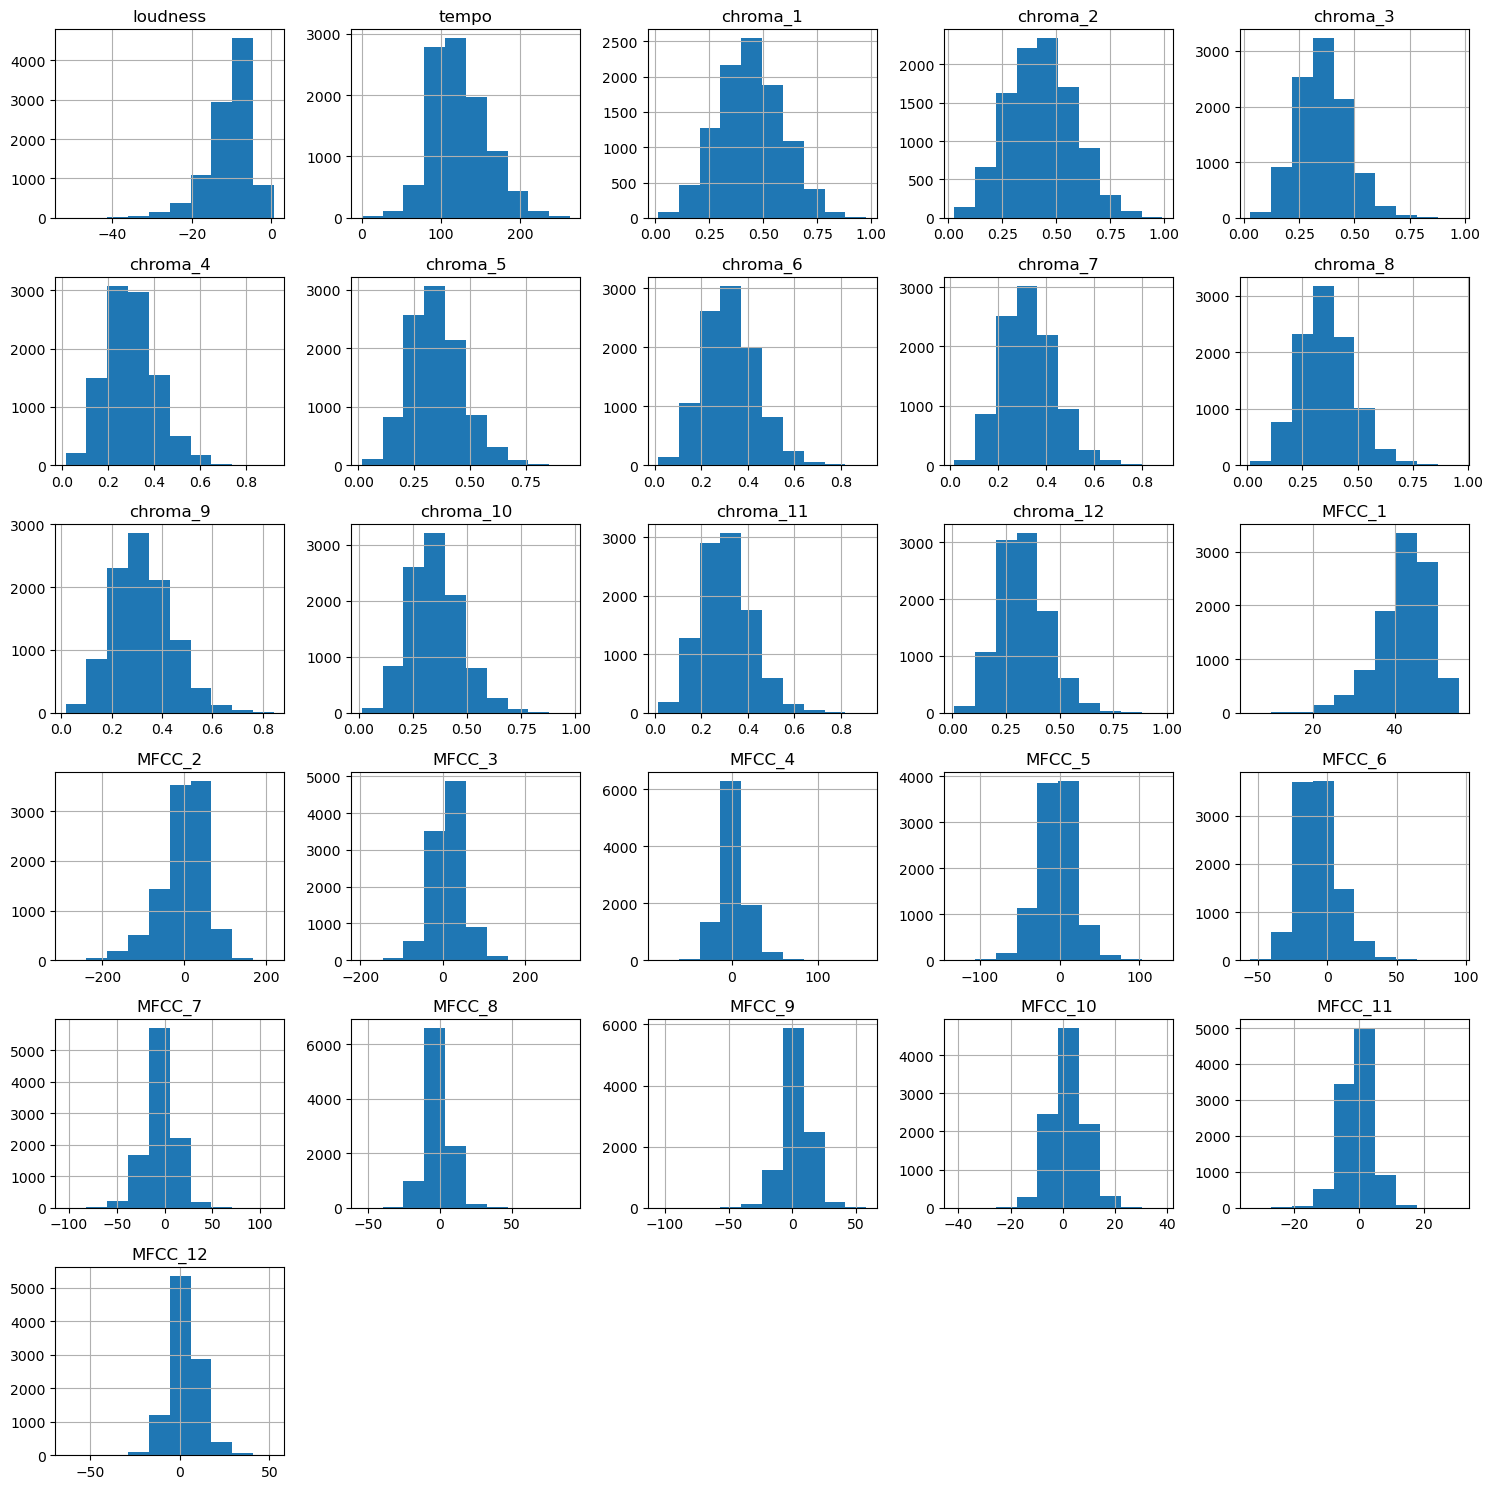

In [37]:
import matplotlib.pyplot as plt
df_for_rec.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

C:\Users\mayko\AppData\Local\Temp\ipykernel_5964\4261880943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_for_rec.corr()


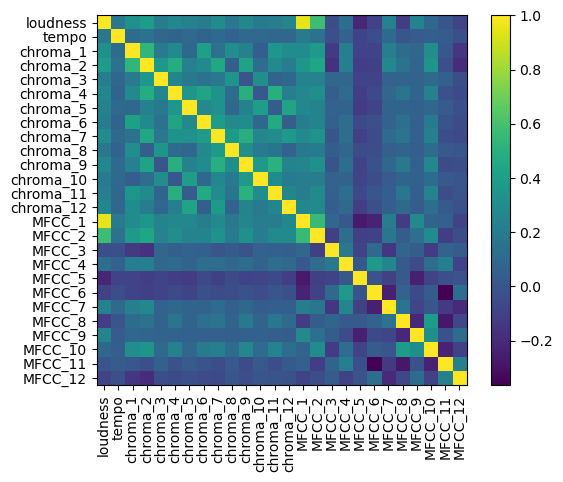

In [38]:
cor = df_for_rec.corr()
plt.imshow(cor, cmap='viridis', interpolation='none')
plt.colorbar()
plt.xticks(range(len(cor)), cor.columns, rotation=90)
plt.yticks(range(len(cor)), cor.columns)
plt.show()

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_for_rec.drop('track_id', axis=1))

num_clusters = 15

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_for_rec['Cluster'] = kmeans.fit_predict(scaled_data)
df_for_rec

C:\Users\mayko\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,track_id,loudness,tempo,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,...,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,Cluster
0,TRAAAAW128F429D538,-11.197,92.198,0.471181,0.625913,0.357945,0.284739,0.367941,0.306885,0.350350,...,-0.789844,-43.234903,15.170947,15.139038,1.505001,6.589571,12.298555,-13.563280,5.442480,3
1,TRAAABD128F429CF47,-9.843,121.274,0.207747,0.408409,0.309996,0.173218,0.443000,0.206716,0.297736,...,12.923576,-2.545036,5.052395,9.238151,-4.345975,5.224104,2.935664,-2.752638,1.729396,11
2,TRAAADZ128F9348C2E,-9.689,100.070,0.407313,0.299594,0.256429,0.427212,0.262032,0.240454,0.169489,...,13.509893,-6.549258,-5.514242,1.885178,-8.963730,3.759863,-5.117954,8.442069,4.477171,14
3,TRAAAEF128F4273421,-9.013,119.293,0.497093,0.315599,0.396124,0.292460,0.399649,0.419144,0.323315,...,5.695314,0.979893,-7.360076,-10.917191,-0.462272,-0.299410,-2.340378,0.261616,-2.427598,1
4,TRAAAFD128F92F423A,-4.501,129.738,0.409174,0.393869,0.368544,0.260059,0.396923,0.423939,0.382548,...,11.080036,-43.505351,-17.997253,-5.284150,-11.754643,10.512851,2.192458,5.448426,1.704516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRBIJMU12903CF892B,-8.087,140.185,0.368072,0.274967,0.249512,0.183254,0.397229,0.164708,0.220130,...,-10.270311,-14.516095,-20.610112,-19.901493,-12.951790,-4.615578,-5.742474,6.830350,10.081257,11
9996,TRBIJNF128F14815A7,-14.517,77.072,0.413326,0.321352,0.213248,0.389990,0.196481,0.270210,0.177233,...,-16.044986,19.135569,-14.294836,-31.500950,-2.722560,6.740302,-0.233595,2.240321,13.499479,6
9997,TRBIJNK128F93093EC,-12.087,118.123,0.579638,0.620157,0.332194,0.401967,0.339006,0.270629,0.393766,...,30.045237,-33.772808,35.094576,-10.181552,-8.719643,7.736720,1.680887,-3.993628,-4.166480,3
9998,TRBIJRN128F425F3DD,-12.574,137.663,0.600018,0.513676,0.481690,0.333339,0.412867,0.386767,0.329142,...,-2.129247,5.226601,-16.666736,-11.432658,2.047599,6.640312,5.373919,0.256056,-1.749801,1


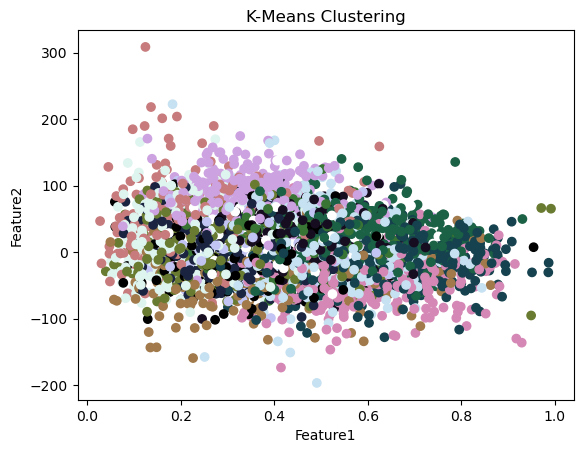

In [54]:
plt.scatter(df_for_rec['chroma_2'], df_for_rec['MFCC_3'], c=df_for_rec['Cluster'], cmap='cubehelix')
plt.title('K-Means Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

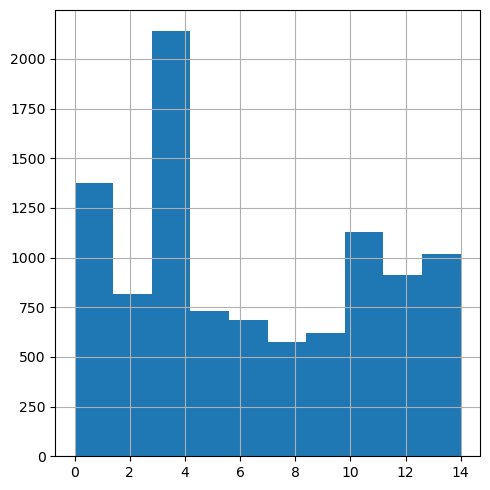

In [55]:
df_for_rec['Cluster'].hist(figsize=(5, 5))
plt.tight_layout()
plt.show()

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(scaled_data)

In [60]:
cosine_sim

array([[ 1.        ,  0.16992009, -0.4290007 , ...,  0.43772002,
        -0.06429806, -0.20056795],
       [ 0.16992009,  1.        ,  0.19207248, ..., -0.01025842,
        -0.34387676, -0.20906172],
       [-0.4290007 ,  0.19207248,  1.        , ..., -0.24026408,
        -0.32254779,  0.12251026],
       ...,
       [ 0.43772002, -0.01025842, -0.24026408, ...,  1.        ,
        -0.21065523, -0.26006112],
       [-0.06429806, -0.34387676, -0.32254779, ..., -0.21065523,
         1.        ,  0.44569121],
       [-0.20056795, -0.20906172,  0.12251026, ..., -0.26006112,
         0.44569121,  1.        ]])

In [58]:
def most_similar_tracks(track_id):
    similar_tracks = sorted(list(enumerate(cosine_sim[track_id])), key=lambda x:x[1], reverse=True)[1:10]
    print("Рекомендации для трека", *list(df.loc[track_id][['name','artist']]), "\n-------------------------------\n")
    for index, sim in similar_tracks:
        print(*df.loc[index][['name','artist']], sim)
most_similar_tracks(94)    

Рекомендации для трека WKYA (drop) Redman 
-------------------------------

CB4 Slum Village 0.8773197620196163
Bob Your Head RUN-DMC 0.8713675779896308
Faces RUN-DMC 0.8260616738673062
Crack RUN-DMC 0.8134528985646965
Mistadobalina Del Tha Funkee Homosapien 0.8134333861311199
U Don't Hear Me Tho' (Street Mix) Rodney O & Joe Cooley 0.8126023755911105
(The Grave Prelude) Mobb Deep 0.8030495191241377
Underarms Grandmaster Flash 0.7897966935562628
HUM Mario Rosenstock 0.786275986218563


In [59]:
df_new = pd.read_csv(r'C:\Users\mayko\YandexDisk-makorablina@edu.hse.ru\eblan from tula\music_features_new.csv')
df_new

,Unnamed: 0,track_id,name,artist,artist_id,artist_mbtags,year,duration,loudness,tempo,...,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12
0,0,TRAAAAW128F429D538,I Didn't Mean To,Casual,ARD7TVE1187B99BFB1,[],0,218.93179,-11.197,92.198,...,-5.789682,-0.789844,-43.234903,15.170947,15.139038,1.505001,6.589571,12.298555,-13.563280,5.442480
1,1,TRAAABD128F429CF47,Soul Deep,The Box Tops,ARMJAGH1187FB546F3,['classic pop and rock'],1969,148.03546,-9.843,121.274,...,23.572293,12.923576,-2.545036,5.052395,9.238151,-4.345975,5.224104,2.935664,-2.752638,1.729396
2,2,TRAAADZ128F9348C2E,Amor De Cabaret,Sonora Santanera,ARKRRTF1187B9984DA,[],0,177.47546,-9.689,100.070,...,50.787329,13.509893,-6.549258,-5.514242,1.885178,-8.963730,3.759863,-5.117954,8.442069,4.477171
3,3,TRAAAEF128F4273421,Something Girls,Adam Ant,AR7G5I41187FB4CE6C,"['uk', 'british', 'english']",1982,233.40363,-9.013,119.293,...,57.599295,5.695314,0.979893,-7.360076,-10.917191,-0.462272,-0.299410,-2.340378,0.261616,-2.427598
4,4,TRAAAFD128F92F423A,Face the Ashes,Gob,ARXR32B1187FB57099,[],2007,209.60608,-4.501,129.738,...,47.091303,11.080036,-43.505351,-17.997253,-5.284150,-11.754643,10.512851,2.192458,5.448426,1.704516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,TRBIJMU12903CF892B,The Hanged Man,Moonspell,AR4C6V01187FB3BAF4,"['black metal', 'portuguese', 'gothic metal', ...",1998,386.19383,-8.087,140.185,...,10.326700,-10.270311,-14.516095,-20.610112,-19.901493,-12.951790,-4.615578,-5.742474,6.830350,10.081257
9996,9996,TRBIJNF128F14815A7,The Wonderful World Of The Young,Danny Williams,AR9JLBU1187B9AAEC4,['south african'],1998,168.01914,-14.517,77.072,...,34.194202,-16.044986,19.135569,-14.294836,-31.500950,-2.722560,6.740302,-0.233595,2.240321,13.499479
9997,9997,TRBIJNK128F93093EC,Sentimental Man,Winston Reedy,ARS1DCR1187B9A4A56,[],0,193.72363,-12.087,118.123,...,-38.916197,30.045237,-33.772808,35.094576,-10.181552,-8.719643,7.736720,1.680887,-3.993628,-4.166480
9998,9998,TRBIJRN128F425F3DD,Zydeco In D-Minor,"Myrick ""Freeze"" Guillory",ARAGMIV11F4C843F78,[],0,300.82567,-12.574,137.663,...,42.006733,-2.129247,5.226601,-16.666736,-11.432658,2.047599,6.640312,5.373919,0.256056,-1.749801
